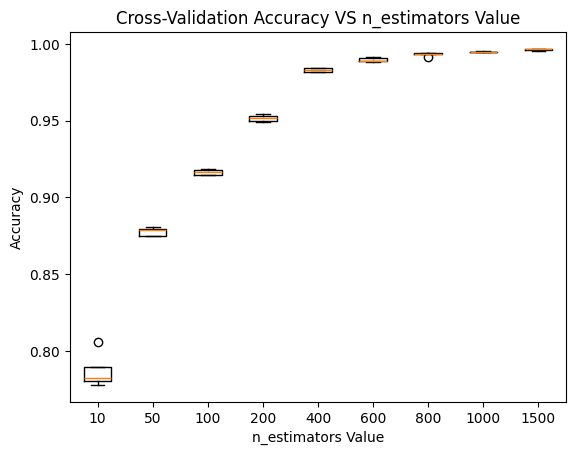

Best n_estimators: 1500

Accuracy: 0.9965997237275529

Precision: 0.9967833491012299

Recall: 0.997160704145372

F1 Score: 0.9969719909159728



In [4]:
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('clean_mushroom_data.csv')

save_fig = './img/n_estimators_accuracy_1500.png'

X = df.drop(columns=['class'])

y = df['class']

# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

n_estimators_list = [10, 50, 100, 200, 400, 600, 800, 1000, 1500]

kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

all_fold_accuracies = []

# Perform cross-validation

for n_estimators_value in n_estimators_list:
    
    fold_accuracies = []
    
    for train_index, val_index in kf.split(X_train):
        
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        gbc = GradientBoostingClassifier(n_estimators = n_estimators_value, random_state = 42)
        gbc.fit(X_train_fold, y_train_fold)
        
        prediction = gbc.predict(X_val_fold)
        
        fold_accuracy = accuracy_score(y_val_fold, prediction)
        fold_accuracies.append(fold_accuracy)
    
    all_fold_accuracies.append(fold_accuracies)
    
all_fold_accuracies = np.array(all_fold_accuracies)

#  Plot and save figure

plt.boxplot(all_fold_accuracies.T, labels = n_estimators_list)
plt.title('Cross-Validation Accuracy VS n_estimators Value')
plt.xlabel('n_estimators Value')
plt.ylabel('Accuracy')
plt.savefig(save_fig, bbox_inches = 'tight')
plt.show()

# Find the best n_estimators value

mean_acc = np.mean(all_fold_accuracies, axis = 1)
best = np.argmax(mean_acc)
best_n_estimators = n_estimators_list[best]

print("Best n_estimators: " + str(best_n_estimators) + "\n")

# Train the classifier on the best n_estimators value

gbc = GradientBoostingClassifier(n_estimators = best_n_estimators, random_state = 42)
gbc.fit(X_train, y_train)

# Make predictions

prediction = gbc.predict(X_test)

# Calculate metrics

target_class = 1    # (1 = Poisonous) , (0 = Edible)

test_acc = accuracy_score(y_test, prediction)
test_prec = precision_score(y_test, prediction, average = 'binary', pos_label = target_class)
test_recall = recall_score(y_test, prediction, average = 'binary', pos_label = target_class)
test_f1 = f1_score(y_test, prediction, average = 'binary', pos_label = target_class)

print("Accuracy: " + str(test_acc) + "\n")
print("Precision: " + str(test_prec) + "\n")
print("Recall: " + str(test_recall) + "\n")
print("F1 Score: " +  str(test_f1) + "\n")

              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00      4128
   Poisonous       1.00      1.00      1.00      5283

    accuracy                           1.00      9411
   macro avg       1.00      1.00      1.00      9411
weighted avg       1.00      1.00      1.00      9411



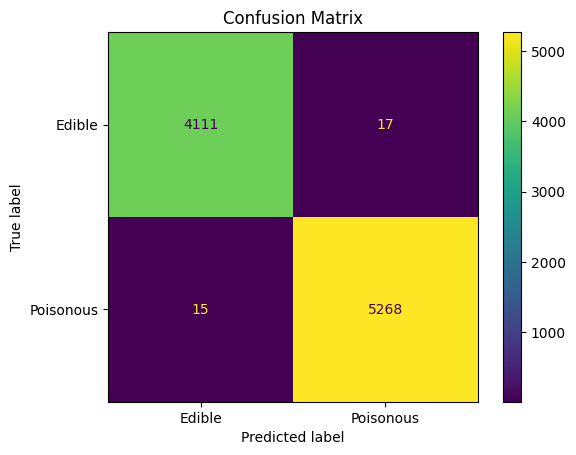

In [6]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction, target_names=['Edible', 'Poisonous']))

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(gbc, X_test, y_test, display_labels=['Edible', 'Poisonous'])
plt.title("Confusion Matrix")
plt.show()

                 Feature  Importance
7             stem-width    0.165488
4        gill-attachment    0.145404
8             stem-color    0.126210
0           cap-diameter    0.093309
5             gill-color    0.078050
6            stem-height    0.071914
2              cap-color    0.064339
1              cap-shape    0.059593
3   does-bruise-or-bleed    0.050308
11               habitat    0.048187
10             ring-type    0.041607
9               has-ring    0.029643
12                season    0.025947


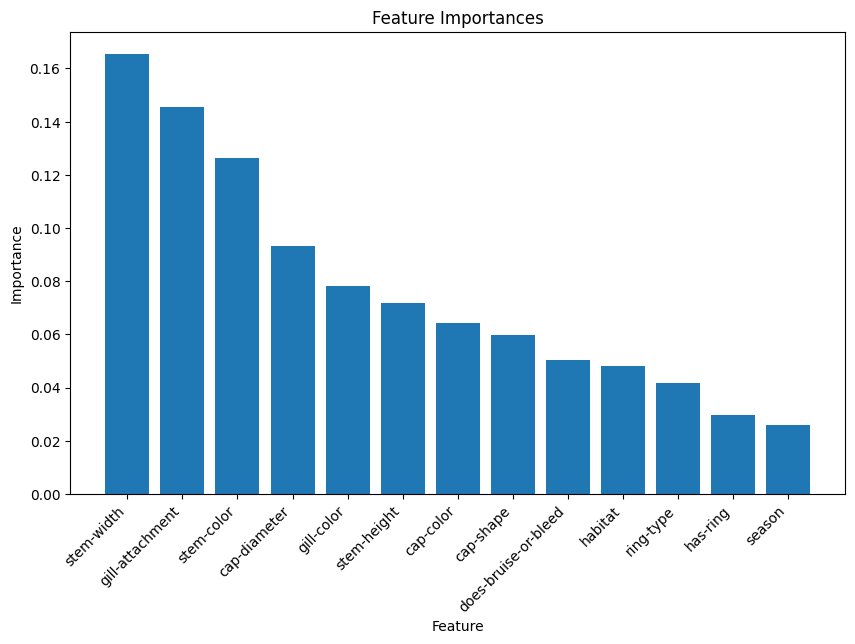

In [3]:
# Extract feature importance scores
importances = gbc.feature_importances_

# Pair feature names with their importance scores
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.show()
